## Example - Counts of Top Skills in Job Posting


In [2]:
#import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
# load data 
dataset = load_dataset('csv', data_files='/Users/onurtemel/Downloads/data_jobs.csv')
df = dataset["train"].to_pandas()
# Data Clean up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

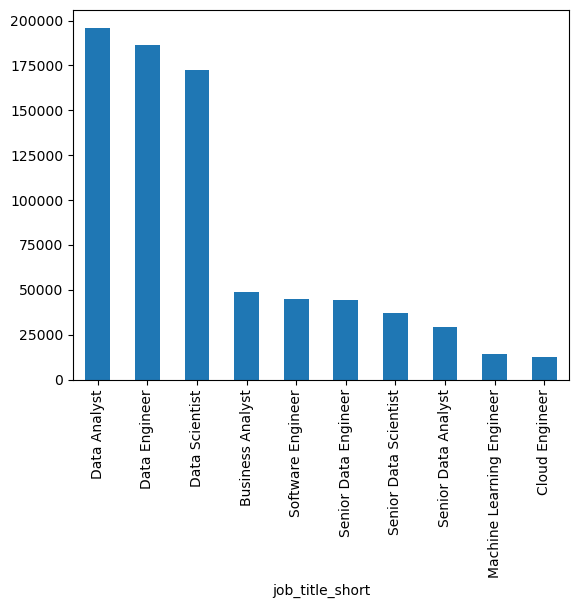

In [3]:
fig , ax = plt.subplots()
df["job_title_short"].value_counts().plot(kind = "bar", ax = ax)

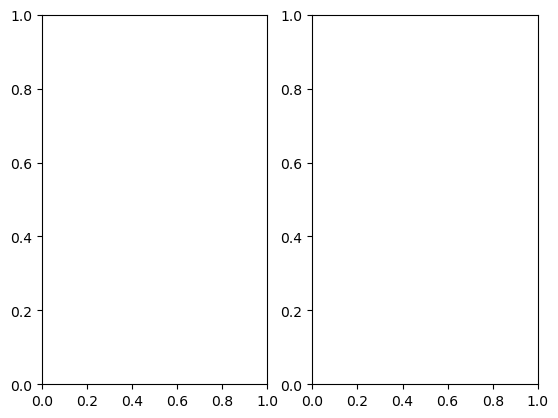

In [4]:
df["job_schedule_type"].value_counts().head(3)
fig,ax = plt.subplots(1,2)


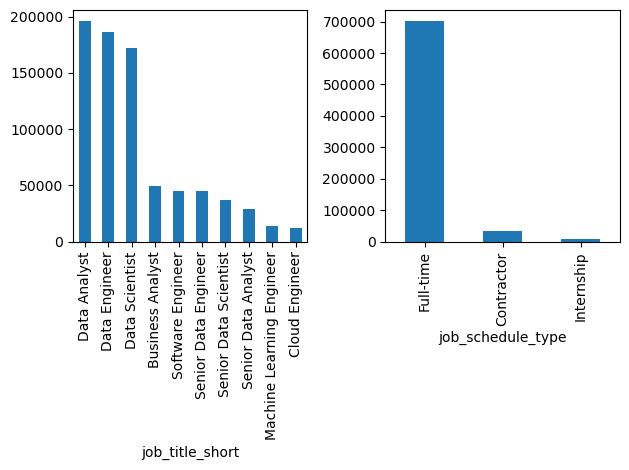

In [5]:
fig , ax = plt.subplots(1,2)
df["job_title_short"].value_counts().plot(kind = "bar", ax = ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind = "bar", ax = ax[1])
fig.tight_layout()

In [6]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_count = skills_count.reset_index(name = "skill_count")
df_skills_count.sort_values(by = "skill_count",ascending = False,inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [7]:
job_titles = ["Data Scientist","Data Engineer", "Data Analyst"]


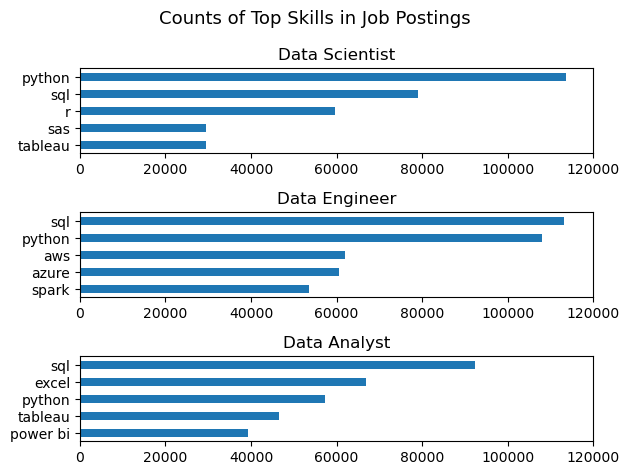

In [8]:
fig, ax = plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot = (df_skills_count[df_skills_count["job_title_short"] == job_title].head(5))
    df_plot.plot(kind = "barh", x = "job_skills", y = "skill_count", ax = ax[i] , title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    fig.tight_layout()
    fig.suptitle("Counts of Top Skills in Job Postings", fontsize = 13)
    ax[i].set_xlim(0,120000)

In [9]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


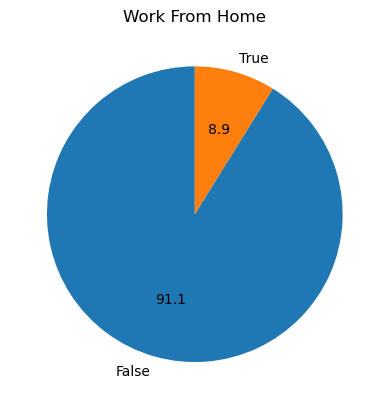

In [10]:
df["job_work_from_home"].value_counts().plot(kind= "pie",startangle = 90, autopct=  "%1.1f")
plt.ylabel("")
plt.title("Work From Home")
plt.show()

## Scatter Plots

In [11]:
df = df[df["job_title_short"] == "Data Analyst"].copy()

In [12]:
df_exploded = df.explode("job_skills")
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [13]:
skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count = ("job_skills","count"),
    median_salary = ("salary_year_avg","median")
    )
skill_stats = skill_stats.sort_values(by="skill_count",ascending = False).head(10)

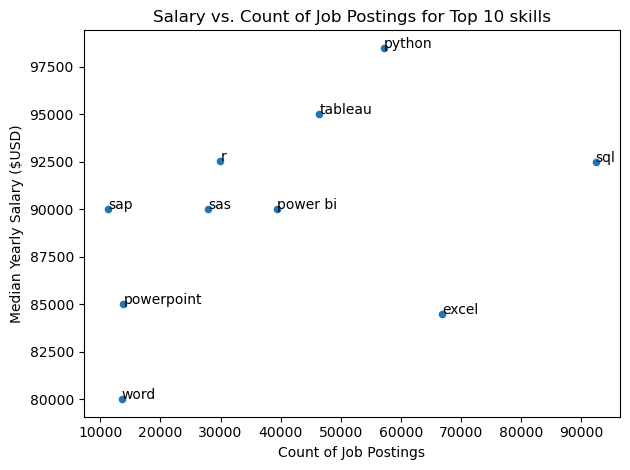

In [14]:
skill_stats.plot(kind = "scatter", x = "skill_count", y="median_salary")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
plt.title("Salary vs. Count of Job Postings for Top 10 skills")
plt.tight_layout()
for i , txt in enumerate(skill_stats.index):
    plt.text(skill_stats["skill_count"].iloc[i],skill_stats["median_salary"].iloc[i], txt)

plt.show()

## Histograms

In [15]:
df_DA_US= df[(df["job_title_short"]  == "Data Analyst") & (df["job_country"] == "United States")].copy()

Text(0.5, 1.0, "Data Analyst' Job postings and salaries in the USA")

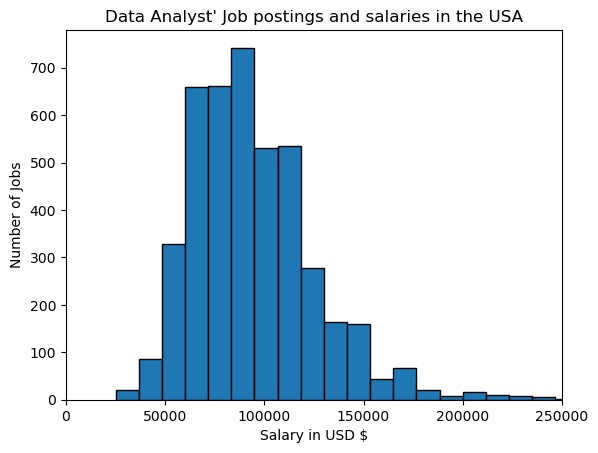

In [16]:
df_DA_US["salary_year_avg"].plot(kind = "hist",bins = 30,edgecolor = "black")
plt.xlim(0,250000)
plt.xlabel("Salary in USD $")
plt.ylabel("Number of Jobs")
plt.title("Data Analyst' Job postings and salaries in the USA")

## Exercise -- Investigate High Paying Skills

In [17]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [18]:
df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"])
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
workfront,3,75000.00
wrike,1,75000.00
xamarin,0,NaN


In [19]:
df_DA_top_pay = df_DA_US_group.sort_values(by = "median", ascending = False).head(10)
df_DA_top_pay
df_DA_skills = df_DA_US_group.sort_values(by= "count",ascending=False).head(10).sort_values(by = "median",ascending = True)



In [20]:
df_DA_skills

,count,median
job_skills,,
word,461,81194.75
excel,1808,84392.00
powerpoint,462,85000.00
sas,926,90000.00
power bi,838,90000.00
sql,2508,91000.00
r,893,92500.00
sql server,286,92500.00
tableau,1364,92875.00


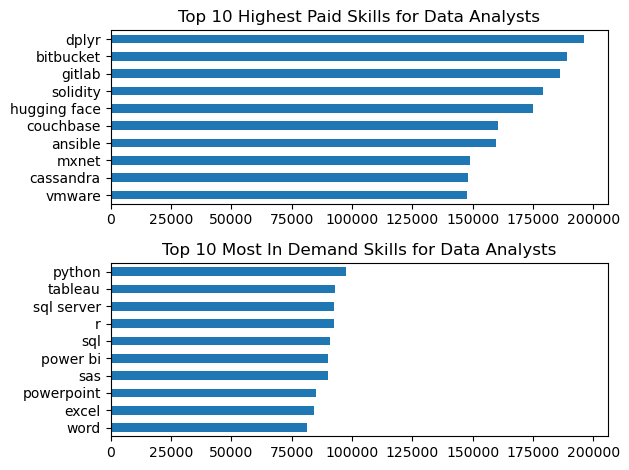

In [21]:

fig, ax = plt.subplots(2,1)  # Corrected
df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0],legend = False)
df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend = False)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[1].set_title("Top 10 Most In Demand Skills for Data Analysts")
plt.FuncFormatter(lambda x, _: f'${int(x / 1000)}K')  # Formatting in thousands
plt.tight_layout()
plt.show()

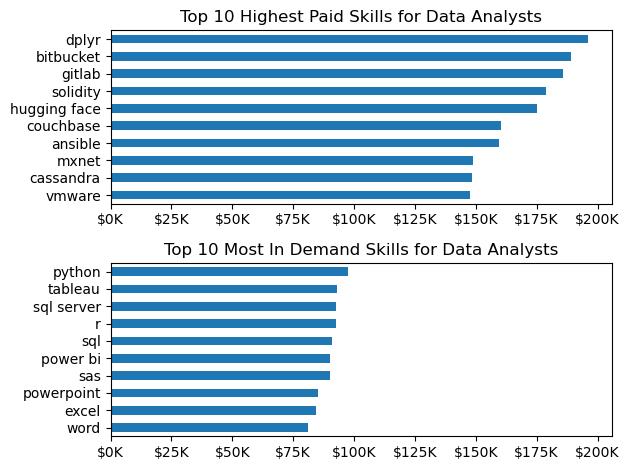

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Importing ticker for formatting

fig, ax = plt.subplots(2, 1)  # Creating two subplots

# Plotting data
df_DA_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)

# Removing axis labels as per your code
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

# Syncing the x-axis limits
ax[1].set_xlim(ax[0].get_xlim())

# Adding titles
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[1].set_title("Top 10 Most In Demand Skills for Data Analysts")

# Formatting the x-axis values in thousands (e.g., $10K)
fmt = plt.FuncFormatter(lambda x, _: f'${int(x / 1000)}K')
ax[0].xaxis.set_major_formatter(fmt)  # Applying to the first subplot
ax[1].xaxis.set_major_formatter(fmt)  # Applying to the second subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Seaborn - Intro

In [23]:
import seaborn as sns

In [24]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [25]:
df_DA_CZ= df[df["job_country"] == "Czechia"]
df_DA_CZ

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1141,Data Analyst,Fraud & Data Analyst,"Prague, Czechia",via LinkedIn,Full-time,False,Czechia,2023-10-19 14:05:14,True,False,Czechia,None,NaN,NaN,Resistant AI,"[sql, aws, jupyter, excel]","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
1500,Data Analyst,Data & Analytics Analyst,"Prague, Czechia",via Cz.indeed.com,Full-time,False,Czechia,2023-07-05 13:37:24,True,False,Czechia,None,NaN,NaN,Keyloop,"[sql, mysql, power bi]","{'analyst_tools': ['power bi'], 'databases': [..."
2215,Data Analyst,Sales Data Analyst,"Prague, Czechia",via LinkedIn,Full-time,False,Czechia,2023-08-21 13:27:28,True,False,Czechia,None,NaN,NaN,Epson Europe B.V.,"[excel, sap]","{'analyst_tools': ['excel', 'sap']}"
3416,Data Analyst,Data Governance Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-06-03 13:28:17,True,False,Czechia,None,NaN,NaN,INFA Partner s.r.o.,[sql],{'programming': ['sql']}
4114,Data Analyst,Master Data Analyst,"Prague, Czechia",via Indeed,Full-time,False,Czechia,2023-02-20 13:58:52,False,False,Czechia,None,NaN,NaN,Adecco,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784365,Data Analyst,Research analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:18,False,False,Czechia,None,NaN,NaN,Bubeník Partners s.r.o.,None,None
784528,Data Analyst,Data Analyst | Automotive,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-26 07:31:48,True,False,Czechia,None,NaN,NaN,"MANPOWER, s.r.o.",None,None
785219,Data Analyst,Data Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-20 07:22:58,False,False,Czechia,None,NaN,NaN,MSD,"[sql, r, python, java, power bi, qlik, tableau]","{'analyst_tools': ['power bi', 'qlik', 'tablea..."
785282,Data Analyst,Sales Data Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-07 06:41:39,True,False,Czechia,None,NaN,NaN,Antal International s.r.o.,None,None
